# Data Visualisation


Here we will have a view on:
    
    - The price distribution for each type of article
    - The Average price and occurence per neighbourhood of each type of article
    - The Average price and occurence per size of each type of article 
    - The Average price and occurence per number of rooms of each type of article

In [1]:
# All libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
sns.set(style="ticks", color_codes=True) 
py.init_notebook_mode(connected=True)

In [2]:
#Define our df [houses, condos, townhouses]

houses = pd.read_csv('houses_fdata.csv')
condos = pd.read_csv('condos_fdata.csv')
townhouses = pd.read_csv('Townhouses_fdata.csv')

In [3]:
# Convert each column the best df

houses = houses.convert_dtypes()
condos= condos.convert_dtypes()
townhouses = townhouses.convert_dtypes()


## Exploration of the datasets
    
    We are looking on our datasets to have and overview
    - Remove outliers
    - Missing values 
    - Optimisation of our Dataset
    
   #### Findings :
    
    _ Size column of houses and townhouses have a lot of missing values however all the condos don't.
    _ For all the price columns, prices above $ 10 000 000 look like outliers we will remove it.
    _ The columns bed and bath are no more useful either for our visualization or our analysis we can drop it. 
    
   

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     827 non-null    Int64 
 1   Province       827 non-null    string
 2   City           827 non-null    string
 3   Street         827 non-null    string
 4   Neighbourhood  827 non-null    string
 5   Price          827 non-null    Int64 
 6   Bed            827 non-null    string
 7   Bath           827 non-null    string
 8   Size           353 non-null    string
 9   room           827 non-null    Int64 
dtypes: Int64(3), string(7)
memory usage: 67.2 KB


In [5]:
houses['Price'].sort_values().head(20)

466         1
270      2250
590      3600
302    735000
300    735000
5      749900
7      749900
433    799000
280    799888
91     799900
182    799900
212    800000
29     849000
34     888800
290    898800
341    898998
74     899000
69     899000
30     899000
350    899000
Name: Price, dtype: Int64

In [6]:
houses['Price'].sort_values().tail(20)

15      9995000
140    10800000
671    10888000
820    10888000
815    10900000
660    11500000
688    11900000
705    11900000
282    11900000
803    12380000
163    13900000
780    14380000
635    14980000
793    16000000
789    17500000
767    19800000
818    20000000
456    25000000
811    26900000
825    45000000
Name: Price, dtype: Int64

For houses, we only have 353 sizes. 
All houses under 700k are outliers and over 10M look really expensive so outliers to.

In [7]:
condos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1756 non-null   Int64 
 1   Province       1756 non-null   string
 2   City           1756 non-null   string
 3   Street         1756 non-null   string
 4   Neighbourhood  1756 non-null   string
 5   Price          1756 non-null   Int64 
 6   Bed            1756 non-null   string
 7   Bath           1756 non-null   string
 8   Size           1756 non-null   string
 9   room           1756 non-null   Int64 
dtypes: Int64(3), string(7)
memory usage: 142.5 KB


In [8]:
condos['Price'].sort_values().head(20)

347       2500
1427     13225
1409     13825
1387     18025
1511     29990
746      49900
1744     59000
1633     59000
238     179900
41      199900
1184    265000
1198    265000
1080    273000
1049    279900
849     285000
1237    286000
1546    289000
683     299900
1519    335000
1015    359000
Name: Price, dtype: Int64

In [9]:
condos['Price'].sort_values().tail(20)

1755     5688000
1712     5980000
95       6288000
3        6450000
1366     6495000
1505     6600000
1736     6990000
1614     6995000
159      7495000
1689     7703888
1355     7800000
1520     7850000
66       8895000
1705     9680000
1715     9880000
1399    11995000
339     12500000
1441    14950000
1642    31620000
1691    34700000
Name: Price, dtype: Int64

outliers over 10M and under 100k

In [10]:
townhouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     311 non-null    Int64 
 1   Province       311 non-null    string
 2   City           311 non-null    string
 3   Street         311 non-null    string
 4   Neighbourhood  311 non-null    string
 5   Price          311 non-null    Int64 
 6   Bed            311 non-null    string
 7   Bath           311 non-null    string
 8   Size           141 non-null    string
 9   room           311 non-null    Int64 
dtypes: Int64(3), string(7)
memory usage: 25.3 KB


In [11]:
townhouses['Price'].sort_values().head(20)

106    699000
49     699900
105    699999
37     725000
95     748000
89     769900
226    799000
154    799000
21     799000
189    799000
75     799000
26     799000
151    849000
62     849900
263    849900
83     850000
196    888000
118    888999
131    897000
193    899000
Name: Price, dtype: Int64

In [12]:
townhouses['Price'].sort_values().tail(20)

22      3995000
180     3995000
291     3995000
260     3998000
136     3999000
273     4000000
308     4295000
280     4388000
299     4389900
215     4500000
121     4500000
290     4680000
301     4999900
211     5295000
264     5395000
141     6295000
287     6600000
270     6995000
307     8500000
304    39999990
Name: Price, dtype: Int64

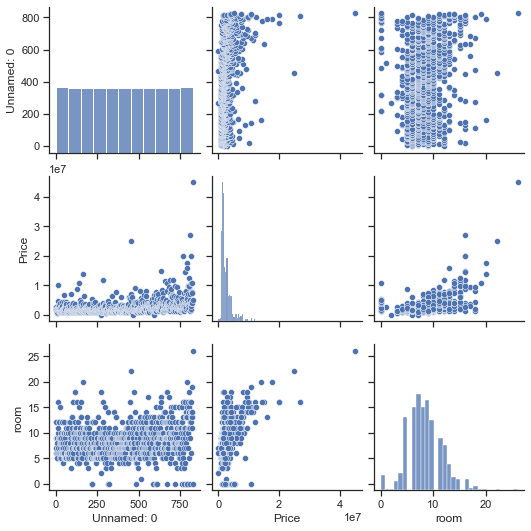

In [13]:
sns.pairplot(houses);

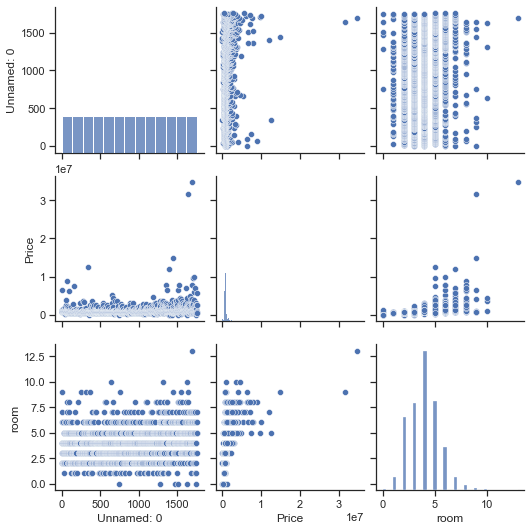

In [14]:
sns.pairplot(condos);

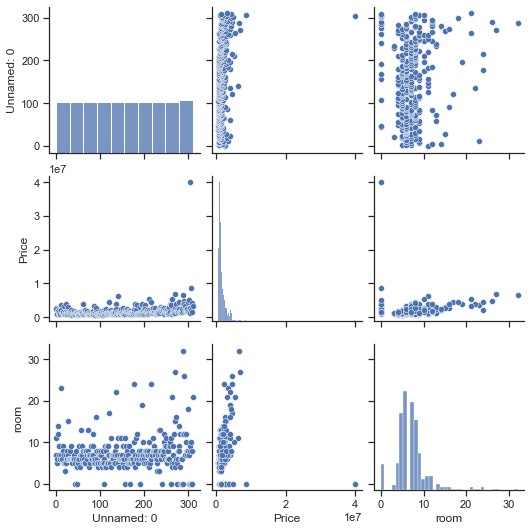

In [15]:
sns.pairplot(townhouses);

In [16]:
# Outliers removal

houses = houses[(houses['Price'] < 10000000) & (houses['Price'] > 700000)]
condos = condos[(condos['Price'] < 10000000) & (condos['Price'] > 100000) ]
townhouses = townhouses[(townhouses['Price'] < 10000000)]

In [17]:
# remove useless column

unless = ['Unnamed: 0','Bed','Bath']

houses = houses.drop(columns = unless)
condos = condos.drop(columns = unless)
townhouses = townhouses.drop(columns = unless)

## Number of rooms

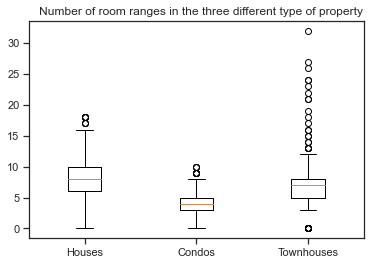

In [18]:
#

plt.boxplot([houses['room'],condos['room'],townhouses['room']],\
            labels = ['Houses','Condos','Townhouses'] )

plt.title('   Number of room ranges in the three different type of property');

### Findings:

* For houses, the number of room is mostly between 0 and 16 with a mean of 8 rooms
* For Condos, the number of rooms is between 0 and 8 with a mean around 4
* For Townhouses, the number of room is between 1 and 11 with a mean of 7. We also get a lot of outliers which goes over 30 room. I guess that it can be a whole building.

May be we should remove all rows which has 0 rooms 

In [19]:
houses[houses['room']==0].count()

Province         17
City             17
Street           17
Neighbourhood    17
Price            17
Size             12
room             17
dtype: int64

In [20]:
condos[condos['room']==0].count()

Province         2
City             2
Street           2
Neighbourhood    2
Price            2
Size             2
room             2
dtype: int64

In [21]:
townhouses[townhouses['room']==0]

,Province,City,Street,Neighbourhood,Price,Size,room
44,ON,Toronto,1399 Lansdowne Avenue,Corso Italia-Davenport,999900,0-0,0
47,ON,Toronto,14 Coxwell Avenue,Greenwood-Coxwell,1099000,0-0,0
108,ON,Toronto,68 Geary Avenue,Wychwood,2095000,<NA>,0
156,ON,Toronto,36 Arcadian Circle,Long Branch,1998800,0-0,0
167,ON,Toronto,50 Foxley Street,Trinity-Bellwoods,1799000,0-0,0
191,ON,Toronto,216 Keele Street,High Park North,2998000,0-0,0
241,ON,Toronto,197 Royal York Road,Mimico,2599000,0-0,0
261,ON,Toronto,161 Berry Road,Stonegate-Queensway,3498000,0-0,0
275,ON,Toronto,1086 Queen Street W,Niagara,2495999,0-0,0
284,ON,Toronto,86 Gainsborough Road,Woodbine Corridor,1399900,0-0,0


## Prices for each type / Price variability for each type



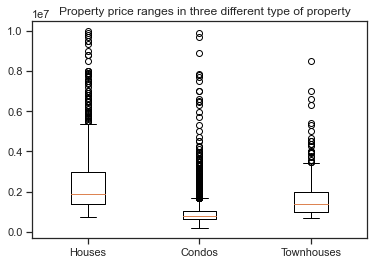

In [22]:
# Box plot

plt.boxplot([houses['Price'],condos['Price'],townhouses['Price']],\
            labels = ['Houses','Condos','Townhouses'] )
plt.title('   Property price ranges in three different type of property');

In [23]:
# For each type of article, give the have price

Mean_type = pd.Series({'Houses': houses.mean()['Price'],
                         'Condos' : condos.mean()['Price'],
                         'Townhouses' : townhouses.mean()['Price']})

Mean_type = Mean_type.convert_dtypes()

Mean_type

C:\Users\david\AppData\Local\Temp/ipykernel_5764/2459737478.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\david\AppData\Local\Temp/ipykernel_5764/2459737478.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\david\AppData\Local\Temp/ipykernel_5764/2459737478.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Houses        2497799.542857
Condos        1034368.073437
Townhouses    1751123.764516
dtype: Float64

In [24]:
# For each type, we can see the number of property

Count_type = pd.Series({'Houses': len(houses['Price']),
                         'Condos' : len(condos['Price']),
                         'Townhouses' : len(townhouses['Price'])})

Count_type 

Houses         805
Condos        1743
Townhouses     310
dtype: int64

In [25]:
# For each type of propety, we have the average price and the number of property

fig = go.Figure()

fig.add_trace(go.Bar(
  x = Count_type.index,
  y = Count_type.values,
  name = "Number of properties",
))

fig.add_trace(go.Bar(
  x = Mean_type.index,
  y = Mean_type.values/1000,
  name = "Mean price in $k ",
)) 

fig.update_layout(title_text="Mean price and number of property for each type  of property")

fig.show()

In [26]:
# Most occurency

Mode_type = pd.Series({'Houses': houses.mode()['Price'],
                         'Condos' : condos.mode()['Price'],
                         'Townhouses' : townhouses.mode()['Price']})

Mode_type

Houses        0     1399000
1        <NA>
2        <NA>
3   ...
Condos                    0    599000
Name: Price, dtype: Int64
Townhouses    0    999000
1      <NA>
2      <NA>
Name: Pric...
dtype: object

In [27]:
# for each type, we have the standard deviation which how dispersed
# the data is in relation to the mean. the plage of the price.

Mode_type = pd.Series({'Houses': houses.std()['Price'],
                         'Condos' : condos.std()['Price'],
                         'Townhouses' : townhouses.std()['Price']})

Mode_type.astype(np.int64)

C:\Users\david\AppData\Local\Temp/ipykernel_5764/1473618061.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\david\AppData\Local\Temp/ipykernel_5764/1473618061.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\david\AppData\Local\Temp/ipykernel_5764/1473618061.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Houses        1681505
Condos         866233
Townhouses    1103079
dtype: int64

## Variability of the price for each neighbourhood.

In [28]:
# the Number of houses fr each neighbourhood

houses['Neighbourhood'].value_counts()

Willowdale East                      41
St. Andrew-Windfields                33
Banbury-Don Mills                    30
Bridle Path-Sunnybrook-York Mills    24
Newtonbrook East                     21
                                     ..
Broadview North                       1
Church-Yonge Corridor                 1
Regent Park                           1
Yonge-St. Clair                       1
Niagara                               1
Name: Neighbourhood, Length: 131, dtype: Int64

In [29]:
# The Number of condos for each neighbourhood

condos['Neighbourhood'].value_counts()

Waterfront Communities C1           238
Church-Yonge Corridor               130
Mimico                              106
Bay Street Corridor                  86
Niagara                              71
                                   ... 
Willowridge-Martingrove-Richview      1
Maple Leaf                            1
Forest Hill North                     1
Guildwood                             1
Playter Estates-Danforth              1
Name: Neighbourhood, Length: 118, dtype: Int64

In [30]:
# The Number of townhouses fr each neighbourhood

townhouses['Neighbourhood'].value_counts()

Corso Italia-Davenport                 12
South Riverdale                        11
Little Portugal                        11
Trinity-Bellwoods                      10
Dovercourt-Wallace Emerson-Junction     9
                                       ..
Humewood-Cedarvale                      1
Ionview                                 1
Briar Hill-Belgravia                    1
Dorset Park                             1
Alderwood                               1
Name: Neighbourhood, Length: 90, dtype: Int64

In [31]:
Nbh_houses = pd.DataFrame({
                   'Mean_h': houses.groupby('Neighbourhood').mean()['Price'],
                   'Count_h': houses['Neighbourhood'].value_counts()},
                   columns = [ 'Mean_h', 'Count_h'])

Nbh_houses.sort_values(by='Mean_h', ascending= False).head(20)

,Mean_h,Count_h
Bridle Path-Sunnybrook-York Mills,6407624.5,24
Rosedale-Moore Park,5642818.181818,11
Casa Loma,5510000.0,3
Niagara,4985000.0,1
St. Andrew-Windfields,4940593.575758,33
Trinity-Bellwoods,4666333.333333,6
Forest Hill South,4533599.875,8
Henry Farm,4498000.0,1
Yonge-St. Clair,4495000.0,1
Lawrence Park South,4486545.454545,11


<AxesSubplot:>

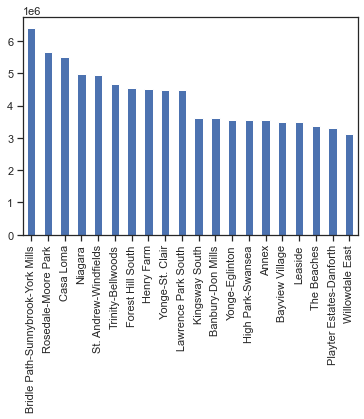

In [32]:
Nbh_houses.sort_values(by='Mean_h', ascending= False)['Mean_h'].head(20).plot(kind= 'bar')

In [33]:
Nbh_condos = pd.DataFrame({
                   'Mean_c': condos.groupby('Neighbourhood').mean()['Price'],
                   'Count_c': condos['Neighbourhood'].value_counts()},
                   columns = [ 'Mean_c', 'Count_c'])

Nbh_condos.sort_values(by='Mean_c', ascending= False).head(20)

,Mean_c,Count_c
Bridle Path-Sunnybrook-York Mills,4393214.285714,7
Lawrence Park South,2895000.0,1
Bedford Park-Nortown,2842250.0,12
Palmerston-Little Italy,2296999.75,4
Annex,2234534.1,70
Yonge-St. Clair,1888546.666667,15
St. Andrew-Windfields,1862000.0,2
South Parkdale,1840714.285714,7
Forest Hill South,1675638.333333,18
Kingsway South,1613500.0,2


<AxesSubplot:>

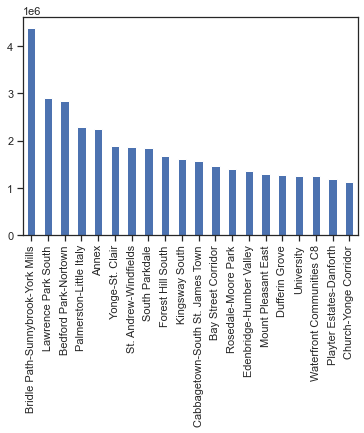

In [34]:
Nbh_condos.sort_values(by='Mean_c', ascending= False)['Mean_c'].head(20).plot(kind= 'bar')

In [35]:
Nbh_townhouses = pd.DataFrame({
                   'Mean_th': townhouses.groupby('Neighbourhood').mean()['Price'],
                   'Count_th': townhouses['Neighbourhood'].value_counts()},
                   columns = [ 'Mean_th', 'Count_th'])

Nbh_townhouses.sort_values(by='Mean_th', ascending= False).head(20)

,Mean_th,Count_th
Ionview,6600000.0,1
South Parkdale,4447966.666667,3
Lawrence Park South,4194666.666667,3
Forest Hill South,3995000.0,1
Humewood-Cedarvale,3925000.0,1
Casa Loma,3845000.0,2
Annex,3727098.5,8
Rosedale-Moore Park,3432666.666667,6
Cabbagetown-South St. James Town,3016800.0,6
Church-Yonge Corridor,2857250.0,4


<AxesSubplot:>

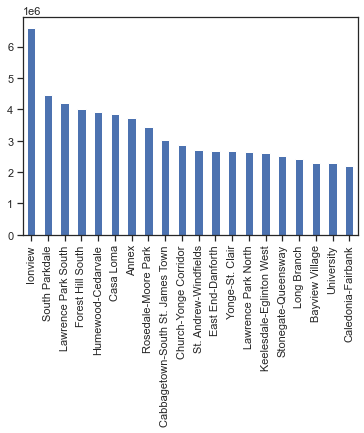

In [36]:
Nbh_townhouses.sort_values(by='Mean_th', ascending= False)['Mean_th'].head(20).plot(kind= 'bar')

In [37]:
Nbh_townhouses.sort_values('Mean_th')['Count_th']

Dorset Park            1
Rouge E11              5
Malvern                7
Milliken               1
Woburn                 1
                      ..
Humewood-Cedarvale     1
Forest Hill South      1
Lawrence Park South    3
South Parkdale         3
Ionview                1
Name: Count_th, Length: 90, dtype: Int64

In [38]:
y_Mean = Nbh_townhouses.sort_values('Count_th').tail(20)['Mean_th']

y_Count = Nbh_townhouses.sort_values('Count_th').tail(20)['Count_th']

x = Nbh_townhouses.sort_values('Count_th').index


# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_Mean,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Mean price',
    orientation='h',
), 1, 1)

fig.append_trace(go.Bar(
    x=y_Count,
    y=x,
    marker=dict(
        color='rgb(128, 0, 128)',
        line=dict(
            color='rgb(128, 0, 128)',
            width=1),
    ),
    name='Number of townhouses',
    orientation='h',
), 1, 2)


fig.update_layout(
    title='Mean price and numbers of townhouses for the first 20 neighbourhoods order by numbers of townhouses',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.9],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        domain=[0, 0.9],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
    ),
    
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)


fig.update_layout()


In [39]:
y_Mean = Nbh_houses.sort_values('Count_h').tail(20)['Mean_h']

y_Count = Nbh_houses.sort_values('Count_h').tail(20)['Count_h']

x = Nbh_houses.sort_values('Count_h').index


# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_Mean,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Mean price',
    orientation='h',
), 1, 1)

fig.append_trace(go.Bar(
    x=y_Count,
    y=x,
    marker=dict(
        color='rgb(128, 0, 128)',
        line=dict(
            color='rgb(128, 0, 128)',
            width=1),
    ),
    name='Number of houses',
    orientation='h',
), 1, 2)


fig.update_layout(
    title='Mean price and numbers of houses for the first 20 neighbourhoods order numbers of houses descending',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.9],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        domain=[0, 0.9],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
    ),
    
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)


fig.update_layout()


In [40]:
y_Mean = Nbh_condos.sort_values('Count_c').tail(20)['Mean_c']

y_Count = Nbh_condos.sort_values('Count_c').tail(20)['Count_c']

x = Nbh_condos.sort_values('Count_c').index


# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_Mean,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Mean price',
    orientation='h',
), 1, 1)

fig.append_trace(go.Bar(
    x=y_Count,
    y=x,
    marker=dict(
        color='rgb(128, 0, 128)',
        line=dict(
            color='rgb(128, 0, 128)',
            width=1),
    ),
    name='Number of condos',
    orientation='h',
), 1, 2)


fig.update_layout(
    title='Mean price and numbers of condos for the first 20 neighbourhoods order numbers of condos descending',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.9],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        domain=[0, 0.9],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
    ),
    
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)


fig.update_layout()
